In [ ]:
<font></font>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [7]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [10]:
df.area_type.value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

# Step01: Data Cleaning
 - Dropping some unimportant cols 
 - Treating missing values

In [12]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

### Feature Selection

In [14]:
df1 = df.drop(['area_type', 'availability','balcony','society'], axis = 'columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [15]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

<font size = 3> We can calculate mean of overall values of the col and fill the Nan values(incase of numerical value). But here we have pretty much data so we can drop the null rows.</font>

<font color = red>**Note: Incase of categorical values. we findout the mode of the values of col and fill the missing value** </font>


In [16]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df2.shape

(13246, 5)

# Feature Engineering

### Exploring Columns
- <font size = 3>size col has strange value. let's see the unique value of size col</font>
- <font color = 'red'>**Solution:** so we create new col which just contains the number of bed room</font>

In [21]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [25]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Danya\AppData\Local\Temp\ipykernel_2484\4052967463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [26]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [27]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [28]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


### Exploring total_sqft column
 - <font size = 3> it contains some range(Not a solid number). and some value with units </font>
 - <font size = 3 >Solution to it is to take average of two values and make it one number</font>

In [32]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [35]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


<font size = 3> It contains (non-uniformity)ranges of value and numbers with units</font>

In [52]:
def conversion_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
       # import re
       # number  = re.search(r'\d+',x)
       # if number:
         #   return float(number.group()) * 10.76
        #else:
        return None 

In [53]:
conversion_to_num('2100 - 2850')

2475.0

In [48]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(conversion_to_num)
df3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [49]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

<font size = 3>In the previous data Index[30]. The value was : 2100 - 2850.
But now it has been changed</font>

# Step02: Feature Engineering
- Creating new col which has price per sqft. Price per sqft is important it can also help us to find some outlier as well  

In [71]:
df4 = df3.copy()
# price is in lacs
df4['price_per_sqft'] = df4['price'] * 100000 / df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Exploring Location Coloum

In [72]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [73]:
len(df4.location.unique())

1304

<font size = 3> Dimensionality reduction is a technique used in machine learning and statistics to reduce the number of input features or variables in a dataset. The primary goal is to simplify the data while retaining as much of its important information as possible. High-dimensional data, where the number of features is large, can pose challenges such as increased computational complexity, the risk of overfitting, and the curse of dimensionality.</font>

<font size = 3> We got high dimesional col. which contains 1304 features. This is called Dimensional Curse,</font>

<font Color = 'red'> Solution: To create other categorey and put all those values which has less than certian threshold counts</font>

<font size = 4 color = 'red'>**Fighting Dimensionality Problem** </font>

In [74]:
# Removing spaces from names then we get 1293 
df4.location = df4.location.apply(lambda x:x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

<font size = 3>**As we can see there are many values which has 1 count. i create a certain threshold to filter out which has less than 10 data pionts and we make it other cate**</font>

In [75]:
location_stats_less_10 = location_stats[location_stats <= 10]
location_stats_less_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [76]:
len(df4.location.unique())

1293

In [77]:
df4.location = df4.location.apply(lambda x: 'other'if x in location_stats_less_10 else x)
len(df4.location.unique())

242

In [79]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


<font>Now i would have 242 values to create one hot encding of it. so i will have 242 cols</font>

# Step03: Removing Outliers
 - STD
 - Sample Domain knowlegde
    - e.g if one one room is typically 300sqft(asked an experts). so we would look into our data. we divide total_sqft by bhk to findout that in our data how many entries the room are less than threshold like 300.

In [80]:
df4[df4.total_sqft/df4.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


if we look into this data. Frist entry 1020 sqft and 6 room. 1020/6 = 170 . it means that one room is 170 sqft which is not possible so this entry is outlier. and just like this other also has similar problem

In [82]:
df4.shape

(13246, 7)

In [83]:
df5 = df4[~(df4.total_sqft/df4.bhk < 300)]
df5.shape

(12502, 7)

### Explore price per sqft and remove outlier using statistics 

In [85]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

# Using std and mean:
describe function and look into max and min value. Discusse it with manager that are these prices fine in the specific region and then act accordingly

### Using STD and Mean
- Find out std and mean of the col. find upper and lower limit of the data to be kept and remove outsider.
- Upper Limit: mean + 3 * std
- Lower Limit: mean - 3 * std




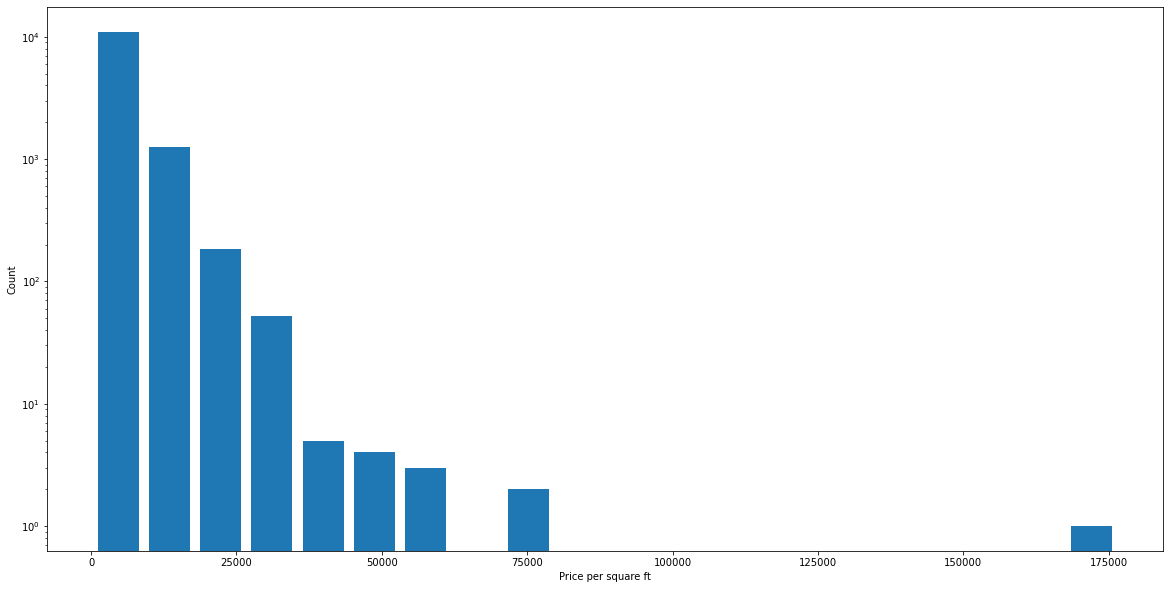

In [94]:
plt.hist(df5.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [91]:
# 1 std is used
def remove_pps_outlier(df):
    df_final = pd.DataFrame()
    for key, subdf in df5.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        lower_lmt = m - std
        upper_lmt = m + std
        reduced_df = subdf[(subdf.price_per_sqft > lower_lmt) & (subdf.price_per_sqft <= upper_lmt)]
        df_final = pd.concat([df_final , reduced_df], ignore_index= True)
    return df_final

df6 = remove_pps_outlier(df5)
df6.shape

(10241, 7)

In [111]:
df6.price_per_sqft.describe()

count    10241.000000
mean      5657.702572
std       2266.476980
min       1250.000000
25%       4244.762955
50%       5172.413793
75%       6426.099852
max      24509.803922
Name: price_per_sqft, dtype: float64

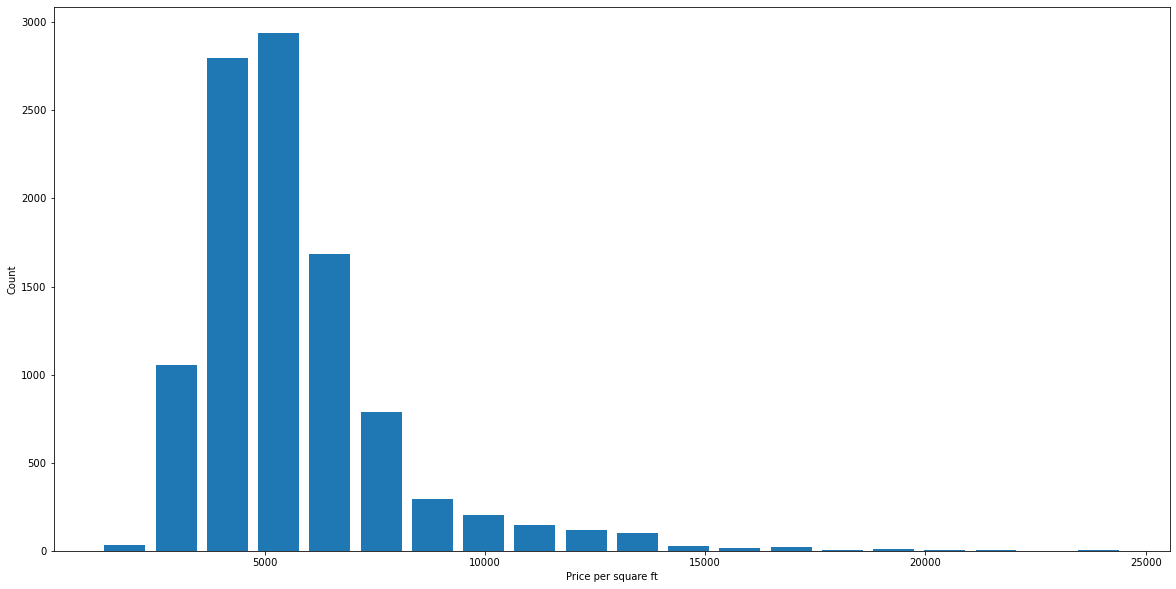

In [96]:
plt.hist(df6.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
#plt.yscale('log')
plt.show()

C:\Users\Danya\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


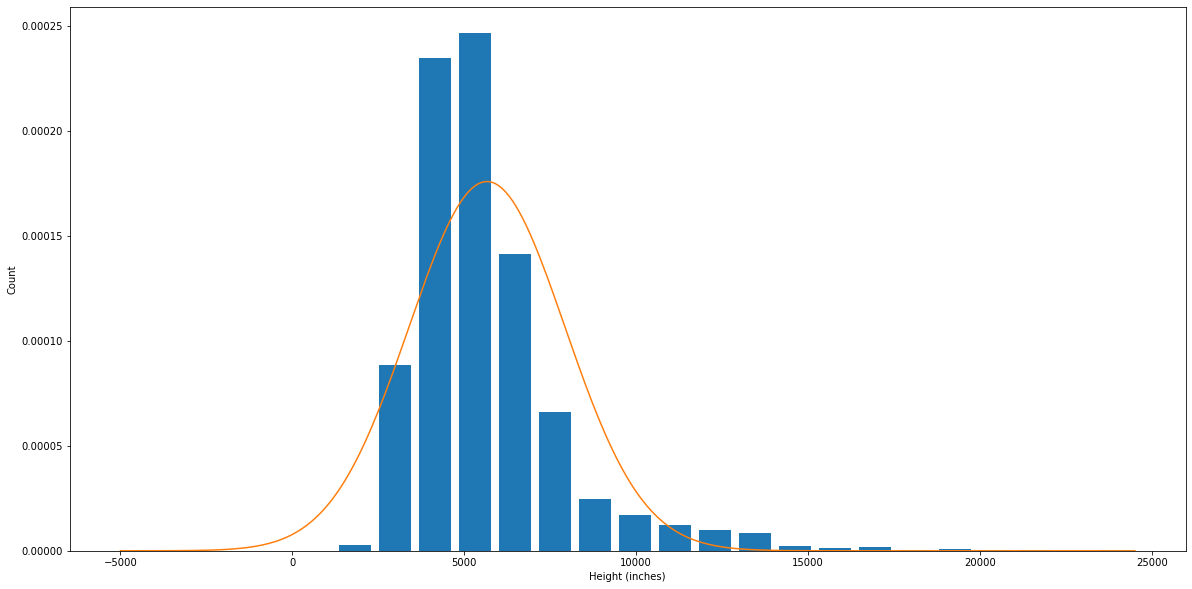

In [97]:
from scipy.stats import norm
import numpy as np

plt.hist(df6.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df6.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df6.price_per_sqft.mean(),df6.price_per_sqft.std()))

In [93]:
lower_limit, upper_limit = df5.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1328.9545454545455, 38256.94444444707)

    **WE GOT UPPER AND LOWER LIMIT AND NOW APPLY THIS FILTER**

# QUANTILE
These quantiles are useful for identifying extreme values or outliers in the price_per_sqft column. The 0.1% quantile gives you a lower bound, and the 99.9% quantile gives you an upper bound for the majority of the data. Values outside this range might be considered as potential outliers or extreme values.

Quantiles are points in a dataset that divide the data into groups of equal probability or percentiles. The term "quantile" is a generalization of the concept of "percentile." The most common quantiles are quartiles (dividing the data into quarters) and percentiles (dividing the data into hundredths).

Here are some key definitions related to quantiles:

Percentile: A percentile is a specific type of quantile that divides the data into 100 equal parts. For example, the 50th percentile is the median, representing the middle point of the data. The 25th and 75th percentiles are the first and third quartiles, respectively.

Quartiles: Quartiles are a special case of quantiles that divide the data into four equal parts. There are three quartiles:

The first quartile (Q1 or 25th percentile) represents the 25% mark.
The second quartile (Q2 or 50th percentile) is the median, representing the 50% mark.
The third quartile (Q3 or 75th percentile) represents the 75% mark.
Median: The median is the value that separates the higher half from the lower half of a dataset. It is the 50th percentile.

Interquartile Range (IQR): The interquartile range is the range between the first quartile (Q1) and the third quartile (Q3). It provides a measure of the spread of the middle 50% of the data.

Quantiles (General): Quantiles in general refer to points in a dataset that divide the data into equal parts. For example, the 0.25 quantile corresponds to the first quartile (Q1), and the 0.75 quantile corresponds to the third quartile (Q3).

When you use the quantile function in Pandas or other statistical software, you are essentially asking for specific points in the dataset that represent certain percentiles or proportions of the data. In the context of your original question, df.price_per_sqft.quantile([0.001, 0.999]) is calculating the 0.1% and 99.9% quantiles of the price_per_sqft column, providing insights into the extreme values in that dataset.


# uSING Z-SCORE TO PERFORM THE ABOVE OUTLIER STEPS IN MEAN AND STD
Z-SCORE = X * MEAN / STD

In [105]:
df5['zscore'] = (df5.price_per_sqft - df5.price_per_sqft.mean()) / df5.price_per_sqft.std()
df5.sample(10)

C:\Users\Danya\AppData\Local\Temp\ipykernel_2484\2893411256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['zscore'] = (df5.price_per_sqft - df5.price_per_sqft.mean()) / df5.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z-score,zscore
2913,Dodda Nekkundi,3 BHK,1804.0,3.0,121.0,3,6707.317073,0.095682,0.095682
2224,other,2 BHK,1370.0,2.0,75.0,2,5474.452555,-0.200102,-0.200102
4681,Whitefield,3 BHK,2700.0,5.0,175.0,3,6481.481481,0.041500,0.041500
4564,other,2 Bedroom,1500.0,2.0,203.0,2,13533.333333,1.733352,1.733352
3929,other,2 BHK,1100.0,2.0,38.0,2,3454.545455,-0.684710,-0.684710
9614,Kudlu,3 BHK,1700.0,3.0,125.0,3,7352.941176,0.250577,0.250577
7718,Sarjapur Road,4 Bedroom,3385.5,6.0,142.0,4,4194.358293,-0.507217,-0.507217
8417,other,2 BHK,1180.0,2.0,39.0,2,3305.084746,-0.720568,-0.720568
7526,Chandapura,2 BHK,674.0,1.0,19.9,2,2952.522255,-0.805153,-0.805153
10916,other,3 BHK,1800.0,3.0,192.0,3,10666.666667,1.045593,1.045593


In [109]:
df_5 = df5[(df5.zscore > -1) & (df5.zscore <= 1) ]
df_5.shape

(11294, 9)

In [110]:
df_5.price_per_sqft.describe()

count    11294.000000
mean      5371.339321
std       1667.328621
min       2149.277061
25%       4123.711340
50%       5091.925499
75%       6363.636364
max      10476.190476
Name: price_per_sqft, dtype: float64

**Now we look for outliers on the basis of sqft and number of bed and having their prices. some house has 3 rooms and less price than house with same or less number sqft. so lets visualize the data and see the problem**

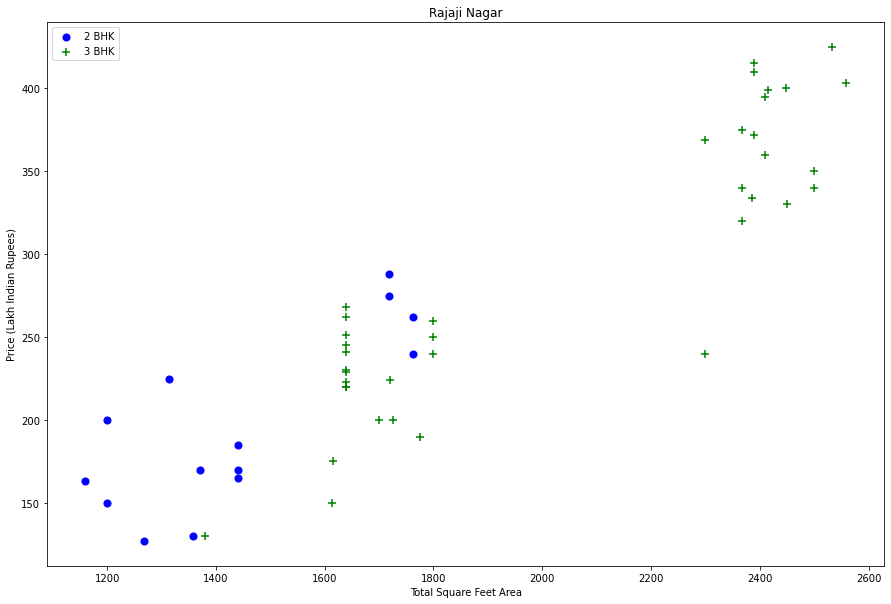

In [113]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

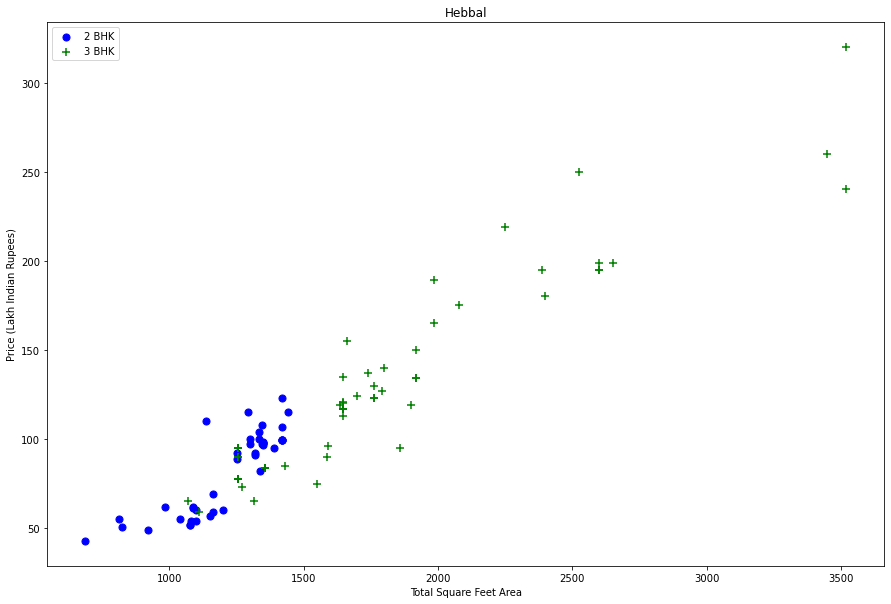

In [114]:
plot_scatter_chart(df6,"Hebbal")

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**

{

    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [132]:
df6.bhk.unique()

array([ 4,  3,  2,  5,  1,  6,  8,  7,  9, 10, 11, 16, 13], dtype=int64)

In [156]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
# df8 = df7.copy()
df7.shape

(7329, 7)

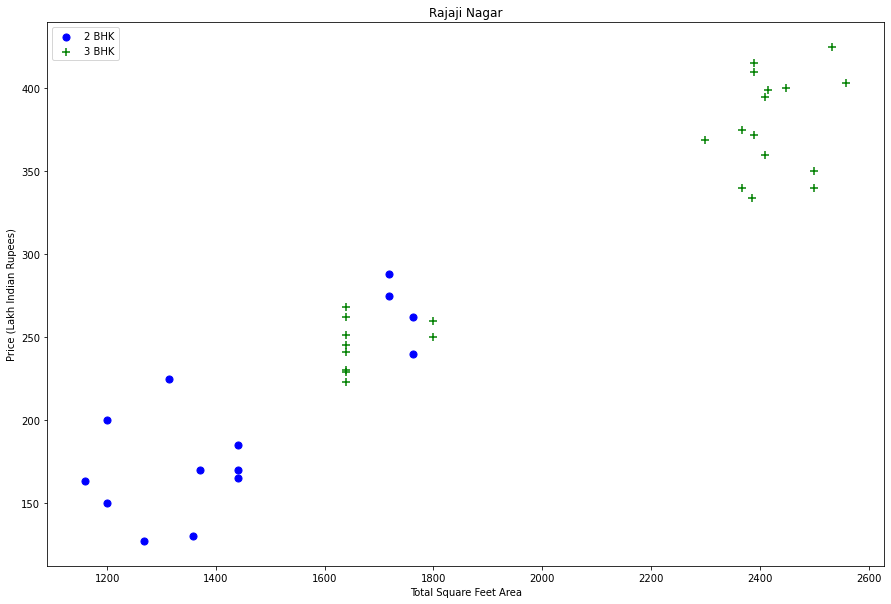

In [157]:
plot_scatter_chart(df7,"Rajaji Nagar")

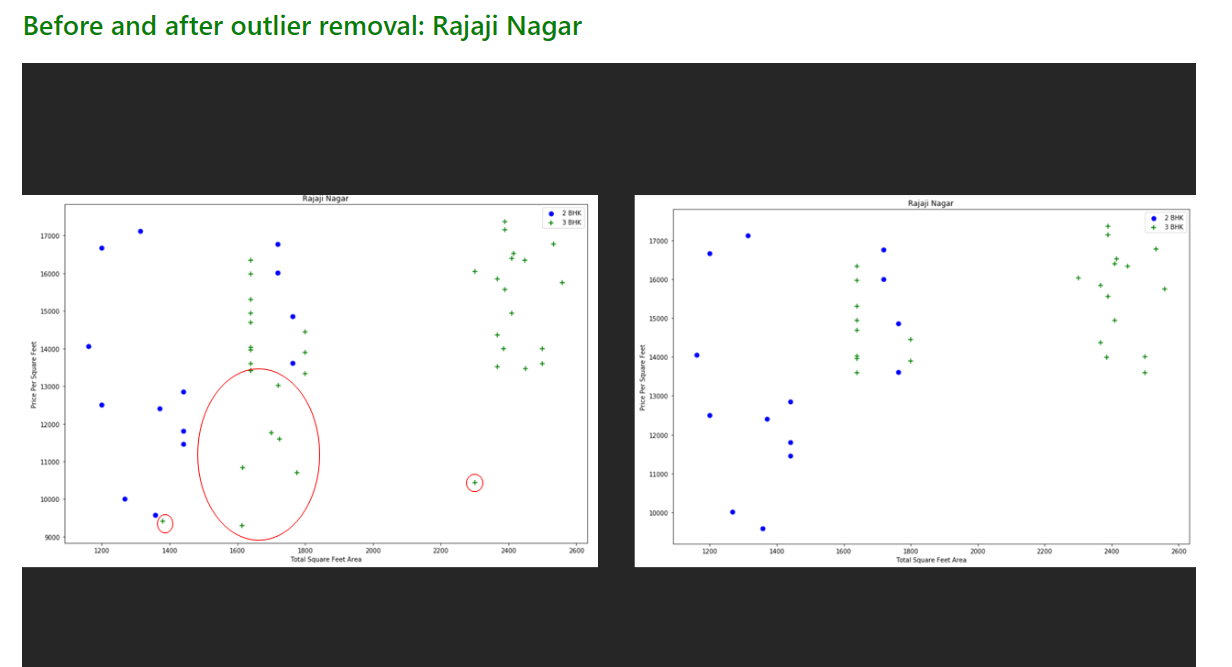

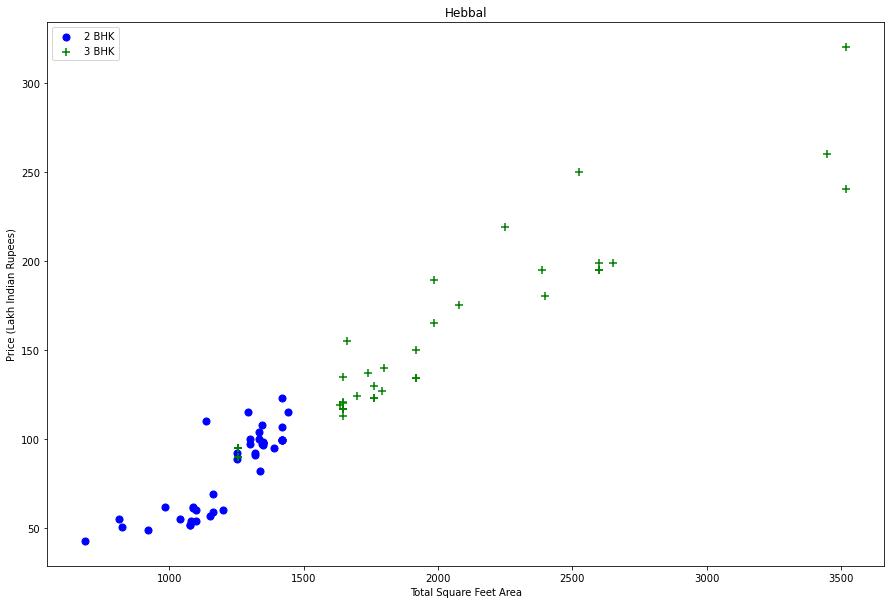

In [160]:
plot_scatter_chart(df7,"Hebbal")

### viualization of Data and see how it look

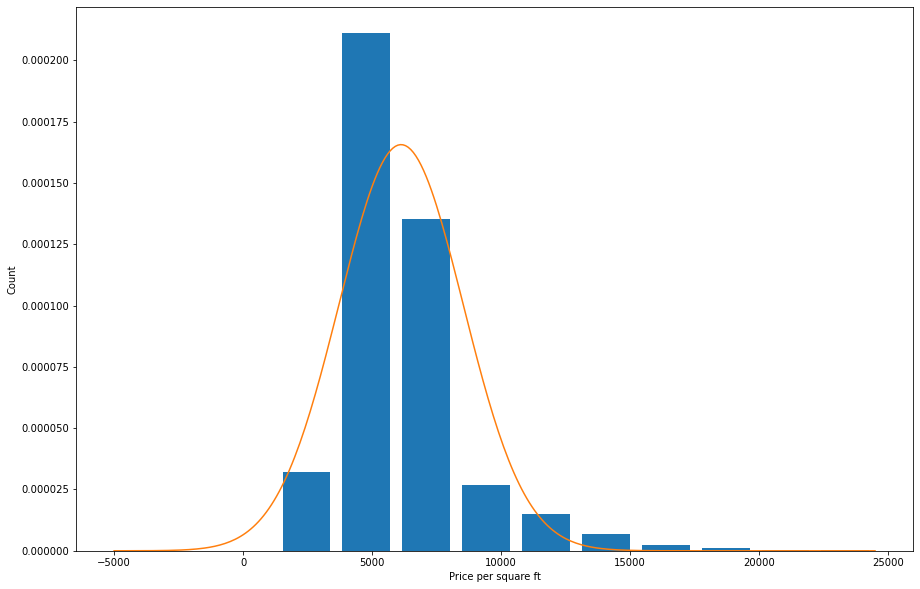

In [166]:
from scipy.stats import norm
import numpy as np

#plt.hist(df7.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.hist(df7.price_per_sqft,rwidth=0.8, density= True)
plt.xlabel('Price per square ft')
plt.ylabel('Count')

rng = np.arange(-5000, df7.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df7.price_per_sqft.mean(),df7.price_per_sqft.std()))

**it looks good most of the datapionts are normally distrubted**

### Exploring bathroom Features

In [167]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

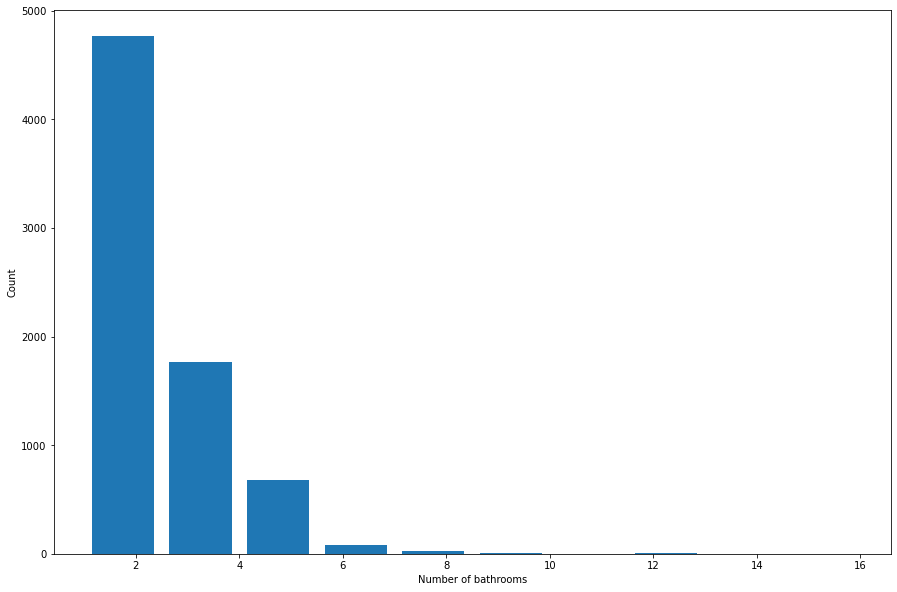

In [170]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

**Most of the data falls in 2 bath**

In [169]:
df7[df7.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


**the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed** 

In [172]:
df7[df7.bath > df7.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [174]:
df8 = df7[df7.bath < df7.bhk + 2]
df8.shape

(7251, 7)

<font>**Now that data is pretty cleaned and it is prepared for machine learning. Before that lets drop some feature that are not useful**</font>

In [192]:
df9 = df8.drop(['size', 'price_per_sqft'], axis = 'columns')
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


# Preparing data for Machine learning algorithem

    - Coverting the location col into one-hot encoding

In [195]:
dummies = pd.get_dummies(df9.location).astype(int).drop('other', axis = 1)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
df10 = pd.concat([df9, dummies], axis = 1)
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
df11 = df10.drop('location', axis = 1)
df11

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Seperating X and Y for model

In [199]:
X = df11.drop('price', axis = 1)
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
Y = df11.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

### Spliting data into training and testing

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.2, random_state=10)

In [202]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


0.8452277697874279

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [205]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size = 0.2,random_state=0)
cross_val_score(LinearRegression(), X, Y, cv = cv)

C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

**We can see that in 5 iterations we almost get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

In [216]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    score = []
    best_model = {}
    cv = ShuffleSplit(n_splits=5 ,test_size= 0.2, random_state=0)
    for algo_name,  config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score= False )
        gs.fit(X,y)
        score.append({
            'model':algo_name,
            'best_score' : gs.best_score_,
            'best_para' : gs.best_params_
        })
        
        best_model[algo_name] = gs.best_estimator_
    result = pd.DataFrame(score, columns=['model', 'best_score', 'best_para'])
    return result, best_model

results, best_model = find_best_model_using_gridsearchcv(X,Y)

C:\Users\Danya\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\vali

C:\Users\Danya\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Danya\ana

C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version

C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` inste

C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [218]:
results

,model,best_score,best_para
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687430,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.717521,"{'criterion': 'mse', 'splitter': 'best'}"


In [219]:
best_model.keys()

dict_keys(['linear_regression', 'lasso', 'decision_tree'])

In [220]:
# I can extract the model i want. e.g
lr_gs_model = best_model['linear_regression']

In [207]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [213]:
np.where(X.columns == '5th Block Hbr Layout')[0][0]

7

In [226]:
def predict_price(location,  sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [215]:
x = np.zeros(len(X.columns))
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [225]:
location = '1st Phase JP Nagar'
sqft = 1000
bath = 2
bhk = 2
loc_index = np.where(X.columns == location)[0][0]
x = np.zeros(len(X.columns))
x[0] = sqft
x[1] = bath
x[2] = bhk
if loc_index >= 0:
    x[loc_index] = 1
#lr_clf.predict([x])
lr_clf.predict([x])[0], lr_gs_model.predict([x])[0]

C:\Users\Danya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Danya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(83.49904677167738, 85.83901256841844)

### Prediction using above function which lr_clf model

In [227]:

predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Danya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677167738

In [228]:

predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\Danya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395194304

# Export the tested model to a pickle file

In [233]:
import pickle
path = r'G:\DataScienceProjects\HousePricePrediction\banglore_home_price_model.pickle'
with open(path, 'wb') as f:
    pickle.dump(lr_clf, f)

In [234]:
import pickle
path = r'G:\DataScienceProjects\HousePricePrediction\banglore_home_price_model_01.pickle'
with open(path, 'wb') as f:
    pickle.dump(lr_gs_model, f)

In [237]:
### Storing Columns Information
import json
path = r'G:\DataScienceProjects\HousePricePrediction\col.json'
col = {
    'data_col' : [i.lower() for i in X.columns]
}
with open(path, 'w') as f:
    f.write(json.dumps(col))